In [1559]:
###########################################################################################################
##                     	       CNN Model Training and evaluation                                         ##          
###########################################################################################################

#************************************ Step1: Import required libraries *************************************************
# Pandas library for data manipulation and analysis
import pandas as pd  
# NumPy library for numerical operations and array handling.
import numpy as np   
# Matplotlib library for creating visualizations and plots.
import matplotlib.pyplot as plt 
# Module for various activation functions.
from tensorflow.keras import activations  
from keras.utils import to_categorical 
# Utility to convert labels to one-hot encoded vectors.
from keras.utils import to_categorical 
# Sequential model for building neural networks.
from keras.models import Sequential 
 # Classes for cross-validation strategies.
from sklearn.model_selection import KFold, StratifiedKFold 
from keras.layers import (
    Dense, Dropout, Flatten, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D
)  # Layers for constructing neural networks.
from keras import backend as K  # Provides low-level operations for Keras backend.
from keras.layers import BatchNormalization  # Layer for batch normalization in neural networks.
from sklearn.model_selection import train_test_split  # Function to split data into training and testing sets.
# Functions for various evaluation metrics and reporting.
from sklearn.metrics import (matthews_corrcoef, auc, roc_curve, classification_report, confusion_matrix,
average_precision_score, precision_recall_curve
)  
# Callback for saving model checkpoints during training.
from keras.callbacks import ModelCheckpoint  
# Utility function for resampling imbalanced datasets.
from sklearn.utils import resample  

############################# Step2: load metrics function #####################
### F1 score, precision, recall and accuracy metrics
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))



In [1601]:
def load_training_data(df_in):
    # df.to_csv("updated_merged_training_data.csv")
    
    X=df_in.drop(columns=["category","BioSample","sra_accession","country","Isolation source"])
#     X=X[[fil]]
#     X= df_in(df_in.columns[list(indices_to_drop)], axis=1)

    y=df_in["category"]
    y
    from sklearn.preprocessing import LabelEncoder
    # Assuming you have a DataFrame named df with a "category" column
    # Extract the "category" column as a pandas Series
    y = df_in["category"]
    # Initialize the LabelEncoder
    label_encoder = LabelEncoder()
    # Fit and transform the label encoder on the extracted Series
    encoded_labels = label_encoder.fit_transform(y)
#     X_train, X_test, y_train, y_test = train_test_split(X.values, encoded_labels, test_size=0.2, random_state=42)
    y
    return X,y

In [1561]:
# df=pd.read_csv("chisquare_training_features_final_undersampled_400.csv")
# # df

In [1715]:
# Loading test data
test_data=pd.read_csv("test_data_all_chisquare_no_corr_undersampled.csv")
test_data
X_test=test_data.drop(columns=dropped_columns)
X_test
y_test=test_data["category"]
y_test

0      poultry
1      poultry
2      poultry
3      poultry
4      poultry
        ...   
285      human
286      human
287      human
288      human
289      human
Name: category, Length: 290, dtype: object

In [1716]:
X_test1, X_val, y_test1, y_val = train_test_split(X_test, y_test, test_size=0.33,stratify=y_test, random_state=42)
y_test1
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

134    poultry
159    poultry
43      bovine
85       swine
147    poultry
        ...   
220      swine
166     bovine
66      bovine
219      swine
117     bovine
Name: category, Length: 203, dtype: object

In [1719]:
list(y_test1)

['poultry',
 'poultry',
 'bovine',
 'swine',
 'poultry',
 'poultry',
 'swine',
 'human',
 'poultry',
 'poultry',
 'swine',
 'swine',
 'swine',
 'human',
 'bovine',
 'bovine',
 'human',
 'bovine',
 'swine',
 'swine',
 'poultry',
 'human',
 'human',
 'swine',
 'poultry',
 'swine',
 'human',
 'bovine',
 'swine',
 'poultry',
 'bovine',
 'swine',
 'poultry',
 'bovine',
 'human',
 'swine',
 'swine',
 'swine',
 'human',
 'swine',
 'swine',
 'human',
 'swine',
 'human',
 'poultry',
 'human',
 'human',
 'swine',
 'poultry',
 'human',
 'poultry',
 'swine',
 'swine',
 'human',
 'poultry',
 'human',
 'bovine',
 'human',
 'bovine',
 'poultry',
 'poultry',
 'swine',
 'swine',
 'human',
 'poultry',
 'swine',
 'bovine',
 'swine',
 'poultry',
 'bovine',
 'bovine',
 'bovine',
 'bovine',
 'poultry',
 'poultry',
 'poultry',
 'human',
 'poultry',
 'poultry',
 'bovine',
 'swine',
 'poultry',
 'poultry',
 'poultry',
 'bovine',
 'human',
 'bovine',
 'swine',
 'human',
 'bovine',
 'poultry',
 'human',
 'swine'

In [1717]:
df_train_chisqure_100=pd.read_csv("chisquare_training_features_100_final_undersampled_no_corr.csv")
df_train_chisqure_100
# df_train_chisqure_100
X,y=load_training_data(df_train_chisqure_100)
X
y

0        swine
1      poultry
2        swine
3        swine
4      poultry
        ...   
707    poultry
708    poultry
709      swine
710      swine
711    poultry
Name: category, Length: 712, dtype: object

In [1700]:
df_train_chisqure_100_under=pd.read_csv("chisquare_training_features_100_final_undersampled_no_corr.csv")
df_train_chisqure_100_under
X,y=load_training_data(df_train_chisqure_100_under)
X

,305245,2027584,3906518,4027906,4552348,1804684,401701,620867,423595,341365,...,4554083,842668,44836,1239006,1922047,2211095,2212974,3051143,2181910,4089957
0,4.0,4.0,0.0,4.0,4.0,0.0,4.0,4.0,0.0,0.0,...,0.0,4.0,0.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0
1,4.0,0.0,0.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,4.0,4.0,0.0,4.0,4.0,0.0,4.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,4.0,4.0
3,4.0,4.0,0.0,4.0,0.0,0.0,4.0,4.0,4.0,0.0,...,0.0,4.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,4.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
709,4.0,4.0,0.0,4.0,4.0,0.0,4.0,4.0,4.0,0.0,...,0.0,4.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,4.0
710,4.0,4.0,0.0,4.0,4.0,0.0,4.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,4.0,4.0


In [1760]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score
from sklearn.model_selection import learning_curve

# Plot Confusion Matrix
def plot_confusion_matrix(y_test_in,y_pred_in, classes,model_name,model_accuracy):
    cm_test = confusion_matrix(y_test, y_pred)
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', 
    xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    plt.savefig(f"confussion_matrix{model}_{accuracy}.png")


import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
# Function to plot the multiclass learning curve
def plot_multiclass_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(8, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Updated function to plot ROC Curve and F1-Score graph for multiclass classification
def plot_roc_and_f1(y_true, y_pred_prob, n_classes):
    y_true=y_true.values
    # Ensure y_true is a NumPy array
    if isinstance(y_true, pd.DataFrame) or isinstance(y_true, pd.Series):
        y_true = y_true.values
    
# Ensure y_true is a 1D or 2D NumPy array
    if len(y_true.shape) == 2 and y_true.shape[1] == 1:
        y_true = y_true.ravel()  # Flatten to 1D if 2D with one column
    
    # Compute ROC curve and ROC area for each class
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.title('Receiver Operating Characteristic')
    
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true, y_pred_prob[:, i], pos_label=i)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    plt.subplot(1, 2, 2)
    plt.title('F1-Score vs. Threshold')
    
    for i in range(n_classes):
        precision, recall, thresholds = precision_recall_curve(y_true, y_pred_prob[:, i], pos_label=i)
        f1_scores = 2 * (precision * recall) / (precision + recall)
        plt.plot(thresholds, f1_scores[:-1], label=f'Class {i}')
    
    plt.xlabel('Threshold')
    plt.ylabel('F1-Score')
    plt.legend(loc='best')
    
    plt.tight_layout()
    plt.show()


In [1711]:
y_test1

134    poultry
159    poultry
43      bovine
85       swine
147    poultry
        ...   
220      swine
166     bovine
66      bovine
219      swine
117     bovine
Name: category, Length: 203, dtype: object

In [1726]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
# Initialize a DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=123)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


# Define a grid of hyperparameters to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,2,5, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10,25],
    'min_samples_leaf': [1, 2, 4,6,8,16,24,32]
}

# Initialize GridSearchCV with cross-validation (but use X_val and y_val for validation)
grid_search = GridSearchCV(classifier, param_grid, cv=5)

# Perform grid search to find the best hyperparameters using X_train and y_train
grid_search.fit(X_resampled, y_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Use the best classifier from grid search
best_classifier = grid_search.best_estimator_

# Fit the best classifier on the entire training data (X_train and y_train)
best_classifier.fit(X_under, y_under)

# Make predictions on the validation data (X_val)
y_val_pred = best_classifier.predict(X_test1)
# Plot Confusion Matrix
# class_names = y.unique()
# plot_confusion_matrix(best_classifier,y_test1, y_val_pred, classes=class_names)

# # Plot Learning Curves
# plot_learning_curve(best_classifier, "Learning Curves", X_resampled, y_resampled, cv=5, n_jobs=-1)

# # Plot ROC Curve and F1-Score graph
# y_val_prob = best_classifier.predict_proba(X_val)
# plot_roc_and_f1(y_val, y_val_prob,n_classes=4)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


0

In [ ]:
X_test1

In [1658]:
y_test

0      poultry
1      poultry
2      poultry
3      poultry
4      poultry
        ...   
285      human
286      human
287      human
288      human
289      human
Name: category, Length: 290, dtype: object

In [ ]:
X_df

In [1606]:
!pip install kmodes

Defaulting to user installation because normal site-packages is not writeable


In [1582]:
X_filtered.to_csv("final_features_final_without_correlated_features_removed.csv")

In [1544]:
# # Create a bar plot for the top features
# top_features = pd.DataFrame(top_features)
# plt.figure(figsize=(18, 8))
# plt.bar(top_features['Feature'], top_features['Score'])
# plt.xlabel('Feature Names')
# plt.ylabel('Scores')
# plt.title('Top 100 Features by Chi-squared Score (Unique SNPs)')
# plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# plt.tight_layout()

# # Show the plot
# plt.show()
# plt.savefig("final_features_chsquare.png")

In [1490]:
# One-hot encode the target variable y
# y_encoded = pd.get_dummies(y)
# Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X.values, encoded_labels, test_size=0.2, random_state=42,stratify=encoded_labels)


In [ ]:
# # no_classes = 3  # Number of classes
# # num_folds = 5  # Number of folds
# classes=4
# # Create new subplots for the plots
# fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
# ax11, ax12, ax13, ax14, ax15, ax16 = axes.flatten()

# # Plot ROC curve for each class
# for i in range(classes):
#     fpr_keras, tpr_keras, _ = roc_curve(y_test[:, i], y_pred_keras[:, i])
#     auc_keras = auc(fpr_keras, tpr_keras)
#     ax11.plot(fpr_keras, tpr_keras, label='ROC class {} (AUC = {:.3f})'.format(i, auc_keras))

# ax11.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', alpha=.8)
# ax11.set(xlabel='False Positive Rate', ylabel='True Positive Rate', title="CNN ROC Curves")
# ax11.legend(loc='lower right')

# # Plot PR curve for each class
# for i in range(classes):
#     precision, recall, _ = precision_recall_curve(y_test2[:, i], y_pred_keras[:, i])
#     pr_auc = auc(recall, precision)
#     ax12.plot(recall, precision, label='PR class {} (AUC = {:.3f})'.format(i, pr_auc))

# ax12.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], xlabel='Recall', ylabel='Precision', title="CNN Precision-Recall Curves")
# ax12.legend(loc='lower left')

# # Calculate predictions
# y_pred = model.predict(X_test2)
# y_pred_cls = np.argmax(y_pred, axis=1)

# # Calculate and print MCC metrics
# conf_matrix = confusion_matrix(y_test, y_pred_cls)
# class_report = classification_report(y_test, y_pred_cls)
# mcc = matthews_corrcoef(y_test, y_pred_cls)

# print("Confusion Matrix:\n", conf_matrix)
# print("Classification Report:\n", class_report)
# print("MCC:", mcc)

# # Plot Train Accuracy vs Val Accuracy for each fold
# for fold in range(num_folds):
#     ax13.plot(model_history[fold]['acc'], linestyle='--', lw=1, label='Train Accuracy Fold {}'.format(fold + 1))
#     ax13.plot(model_history[fold]['val_acc'], label='Val Accuracy Fold {}'.format(fold + 1))

# ax13.set(title='Train Accuracy vs Val Accuracy')
# ax13.legend(prop={'size': 5})

# # Plot Cross-Validation Accuracy for each fold
# cross_val_accuracy = [history['val_acc'][-1] for history in model_history]
# ax14.bar(range(1, num_folds + 1), cross_val_accuracy, color='c')
# ax14.set(title='Cross-Validation Accuracy', xlabel='Fold', ylabel='Accuracy')

# # Plot Confusion Matrix
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=ax15)
# ax15.set(title='Confusion Matrix', xlabel='Predicted Labels', ylabel='True Labels')

# # You can add other plots as needed in the remaining axes (ax16, ax17, etc.)

# # Adjust layout and display the plots
# plt.tight_layout()
# plt.savefig("../figures/CNN_Training_Val_Evaluation.jpg")
# plt.show()

# 1. Hyperparameter Tuning: Logistic Regression Undersampling

In [1780]:
# Define the hyperparameters to tune
C_values = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 4, 10, 100]
penalties = ['l1', 'l2']
solvers = ['lbfgs', 'liblinear', 'saga']
max_iters = [50, 100, 200, 300, 500]
class_weights = [None, 'balanced']
random_states = [0, 42, 100, 999, 142, 123]
dual_values = [True, False]
tolerances = [1e-4, 1e-3, 1e-2]

# Initialize variables to keep track of the best model and its performance
best_model = None
best_accuracy = 0.0


# Iterate over hyperparameters
for C in C_values:
    for penalty in penalties:
        if penalty == 'l1':
            solver = 'liblinear'
            multi_class = 'ovr'
            dual = False  # 'liblinear' does not support dual=True
        else:
            solver = 'lbfgs'
            multi_class = 'multinomial'
            dual = False  # 'lbfgs' only supports dual=False

        for max_iter in max_iters:
            for class_weight in class_weights:
                for random_state in random_states:
                    for tol in tolerances:
                        # Skip incompatible combinations
                        if penalty == 'l1' and dual:
                            continue

                        # Create a logistic regression model with the current hyperparameters
                        model = LogisticRegression(
                            C=C,
                            penalty=penalty,
                            solver=solver,
                            max_iter=max_iter,
                            class_weight=class_weight,
                            random_state=random_state,
                            dual=dual,
                            tol=tol,
                            multi_class=multi_class
                        )

                        # Train the model on the training data
                        model.fit(X_under, y_under)

                        # Make predictions on the validation data
                        y_val_pred = model.predict(X_test)

                        # Calculate accuracy on the validation data
                        accuracy = accuracy_score(y_test, y_val_pred)

                        # Check if this model has the highest accuracy so far
                        if accuracy > best_accuracy:
                            print(f"Accuracy improved to {accuracy}")
                            best_accuracy = accuracy
                            best_model = model
                            best_hyperparameters = {
                                'C': C,
                                'penalty': penalty,
                                'solver': solver,
                                'max_iter': max_iter,
                                'class_weight': class_weight,
                                'random_state': random_state,
                                'dual': dual,
                                'tol': tol
                            }
                        else:
                            print(f"Accuracy not improved from {best_accuracy}")

# Print the best hyperparameters
print("Best Hyperparameters:", best_hyperparameters)

# Train the best model on the combined training and validation data
best_model.fit(X_under, y_under)

# Evaluate the best model's performance on the test data
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")


Accuracy improved to 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.24137931034

Accuracy not improved from 0.4413793103448276
Accuracy not improved from 0.4413793103448276
Accuracy not improved from 0.4413793103448276
Accuracy not improved from 0.4413793103448276
Accuracy not improved from 0.4413793103448276
Accuracy not improved from 0.4413793103448276
Accuracy not improved from 0.4413793103448276
Accuracy not improved from 0.4413793103448276
Accuracy not improved from 0.4413793103448276
Accuracy not improved from 0.4413793103448276
Accuracy not improved from 0.4413793103448276
Accuracy not improved from 0.4413793103448276
Accuracy not improved from 0.4413793103448276
Accuracy not improved from 0.4413793103448276
Accuracy not improved from 0.4413793103448276
Accuracy not improved from 0.4413793103448276
Accuracy not improved from 0.4413793103448276
Accuracy not improved from 0.4413793103448276
Accuracy not improved from 0.4413793103448276
Accuracy not improved from 0.4413793103448276
Accuracy not improved from 0.4413793103448276
Accuracy not improved from 0.44137

Accuracy not improved from 0.4517241379310345
Accuracy not improved from 0.4517241379310345
Accuracy not improved from 0.4517241379310345
Accuracy not improved from 0.4517241379310345
Accuracy not improved from 0.4517241379310345
Accuracy not improved from 0.4517241379310345
Accuracy not improved from 0.4517241379310345
Accuracy not improved from 0.4517241379310345
Accuracy not improved from 0.4517241379310345
Accuracy not improved from 0.4517241379310345
Accuracy not improved from 0.4517241379310345
Accuracy not improved from 0.4517241379310345
Accuracy not improved from 0.4517241379310345
Accuracy not improved from 0.4517241379310345
Accuracy not improved from 0.4517241379310345
Accuracy not improved from 0.4517241379310345
Accuracy not improved from 0.4517241379310345
Accuracy not improved from 0.4517241379310345
Accuracy not improved from 0.4517241379310345
Accuracy not improved from 0.4517241379310345
Accuracy not improved from 0.4517241379310345
Accuracy not improved from 0.45172

Accuracy not improved from 0.4862068965517241
Accuracy not improved from 0.4862068965517241
Accuracy not improved from 0.4862068965517241
Accuracy not improved from 0.4862068965517241
Accuracy not improved from 0.4862068965517241
Accuracy not improved from 0.4862068965517241
Accuracy not improved from 0.4862068965517241
Accuracy not improved from 0.4862068965517241
Accuracy not improved from 0.4862068965517241
Accuracy not improved from 0.4862068965517241
Accuracy not improved from 0.4862068965517241
Accuracy not improved from 0.4862068965517241
Accuracy not improved from 0.4862068965517241
Accuracy not improved from 0.4862068965517241
Accuracy not improved from 0.4862068965517241
Accuracy not improved from 0.4862068965517241
Accuracy not improved from 0.4862068965517241
Accuracy not improved from 0.4862068965517241
Accuracy not improved from 0.4862068965517241
Accuracy not improved from 0.4862068965517241
Accuracy not improved from 0.4862068965517241
Accuracy not improved from 0.48620

Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.52068

Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.52068

Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.52068

Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.52068

Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.52068

Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.52068

Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.52068

Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.52068

Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.52068

Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.52068

Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.52068

Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.52068

Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.52068

Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.52068

Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.52068

Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.52068

Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.52068

Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.52068

Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138


/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138


/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138


/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138


/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.5206896551724138
Accuracy not improved from 0.52068

# 1B) Logistic Regression Oversampling


In [1781]:
# Define the hyperparameters to tune
C_values = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 4, 10, 100]
penalties = ['l1', 'l2']
solvers = ['lbfgs', 'liblinear', 'saga']
max_iters = [50, 100, 200, 300, 500]
class_weights = [None, 'balanced']
random_states = [0, 42, 100, 999, 142, 123]
dual_values = [True, False]
tolerances = [1e-4, 1e-3, 1e-2]

# Initialize variables to keep track of the best model and its performance
best_model = None
best_accuracy = 0.0


# Iterate over hyperparameters
for C in C_values:
    for penalty in penalties:
        if penalty == 'l1':
            solver = 'liblinear'
            multi_class = 'ovr'
            dual = False  # 'liblinear' does not support dual=True
        else:
            solver = 'lbfgs'
            multi_class = 'multinomial'
            dual = False  # 'lbfgs' only supports dual=False

        for max_iter in max_iters:
            for class_weight in class_weights:
                for random_state in random_states:
                    for tol in tolerances:
                        # Skip incompatible combinations
                        if penalty == 'l1' and dual:
                            continue

                        # Create a logistic regression model with the current hyperparameters
                        model = LogisticRegression(
                            C=C,
                            penalty=penalty,
                            solver=solver,
                            max_iter=max_iter,
                            class_weight=class_weight,
                            random_state=random_state,
                            dual=dual,
                            tol=tol,
                            multi_class=multi_class
                        )

                        # Train the model on the training data
                        model.fit(X_resampled, y_resampled)

                        # Make predictions on the validation data
                        y_val_pred = model.predict(X_test)

                        # Calculate accuracy on the validation data
                        accuracy = accuracy_score(y_test, y_val_pred)

                        # Check if this model has the highest accuracy so far
                        if accuracy > best_accuracy:
                            print(f"Accuracy improved to {accuracy}")
                            best_accuracy = accuracy
                            best_model = model
                            best_hyperparameters = {
                                'C': C,
                                'penalty': penalty,
                                'solver': solver,
                                'max_iter': max_iter,
                                'class_weight': class_weight,
                                'random_state': random_state,
                                'dual': dual,
                                'tol': tol
                            }
                        else:
                            print(f"Accuracy not improved from {best_accuracy}")

# Print the best hyperparameters
print("Best Hyperparameters:", best_hyperparameters)

# Train the best model on the combined training and validation data
best_model.fit(X_resampled, y_resampled)

# Evaluate the best model's performance on the test data
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")


Accuracy improved to 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.24137931034

Accuracy improved to 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improv

Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not 

Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy not improved from 0.45517241379310347
Accuracy improved to 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.482758

Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.48275

Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.48275

Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy improved to 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not 

Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy n

Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy n

Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy n

Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy n

Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy n

Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy n

Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy n

Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy n

Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy n

Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy n

Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy n

Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy n

Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy n

Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy n

/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931


/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931


/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931


/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931


/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy n

Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy n

/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931


/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931


/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931


/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931


/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931


/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931


/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931


/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931


/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931


/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931


/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931


/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931


/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931


/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy not improved from 0.496551724137931
Accuracy n

# 3c) Logistic Regression Imbalanced

In [1784]:
# Define the hyperparameters to tune
C_values = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 4, 10, 100]
penalties = ['l1', 'l2']
solvers = ['lbfgs', 'liblinear', 'saga']
max_iters = [50, 100, 200, 300, 500]
class_weights = [None, 'balanced']
random_states = [0, 42, 100, 999, 142, 123]
dual_values = [True, False]
tolerances = [1e-4, 1e-3, 1e-2]

# Initialize variables to keep track of the best model and its performance
best_model = None
best_accuracy = 0.0


# Iterate over hyperparameters
for C in C_values:
    for penalty in penalties:
        if penalty == 'l1':
            solver = 'liblinear'
            multi_class = 'ovr'
            dual = False  # 'liblinear' does not support dual=True
        else:
            solver = 'lbfgs'
            multi_class = 'multinomial'
            dual = False  # 'lbfgs' only supports dual=False

        for max_iter in max_iters:
            for class_weight in class_weights:
                for random_state in random_states:
                    for tol in tolerances:
                        # Skip incompatible combinations
                        if penalty == 'l1' and dual:
                            continue

                        # Create a logistic regression model with the current hyperparameters
                        model = LogisticRegression(
                            C=C,
                            penalty=penalty,
                            solver=solver,
                            max_iter=max_iter,
                            class_weight=class_weight,
                            random_state=random_state,
                            dual=dual,
                            tol=tol,
                            multi_class=multi_class
                        )

                        # Train the model on the training data
                        model.fit(X, y)

                        # Make predictions on the validation data
                        y_val_pred = model.predict(X_test)

                        # Calculate accuracy on the validation data
                        accuracy = accuracy_score(y_test, y_val_pred)

                        # Check if this model has the highest accuracy so far
                        if accuracy > best_accuracy:
                            print(f"Accuracy improved to {accuracy}")
                            best_accuracy = accuracy
                            best_model = model
                            best_hyperparameters = {
                                'C': C,
                                'penalty': penalty,
                                'solver': solver,
                                'max_iter': max_iter,
                                'class_weight': class_weight,
                                'random_state': random_state,
                                'dual': dual,
                                'tol': tol
                            }
                        else:
                            print(f"Accuracy not improved from {best_accuracy}")

# Print the best hyperparameters
print("Best Hyperparameters:", best_hyperparameters)

# Train the best model on the combined training and validation data
best_model.fit(X, y)

# Evaluate the best model's performance on the test data
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")


Accuracy improved to 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.2413793103448276
Accuracy not improved from 0.24137931034

Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.44827

Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.4482758620689655
Accuracy not improved from 0.44827

Accuracy not improved from 0.47586206896551725
Accuracy not improved from 0.47586206896551725
Accuracy not improved from 0.47586206896551725
Accuracy improved to 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.48275862

Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy not improved from 0.4827586206896552
Accuracy improved to 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.48965517241

Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.48965

Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.48965

Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.48965

Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.48965

Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.48965

Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.48965

Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.4896551724137931
Accuracy not improved from 0.48965

Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy

Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy

Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy

Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy

Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy

Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy

/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5


/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5


/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5


/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5


/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy

Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy

/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5


/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5


/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5


/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5


/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5


/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5


/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy not improved from 0.5
Accuracy

In [1740]:
len(y_test)

290

In [1105]:
test_data_ethiopia

1

In [1097]:
test_data_ethiopia.isna().sum()

305245     0
2027584    0
3906518    0
4027906    0
4552348    0
          ..
1204491    0
2577505    0
1539534    0
4261227    0
2784060    0
Length: 300, dtype: int64

In [1549]:
# evaluate multinomial logistic regression model
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
# define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# # Define the multinomial logistic regression model
# model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# # Train the model on the training data
model.fit(X_under, y_under)
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy on Test Data: %.3f' % accuracy)

# You now have predictions in 'y_pred' for your test data, and you've evaluated the model's performance on the test data.


Mean Accuracy: 0.956 (0.028)
Accuracy on Test Data: 0.466


# KNN


Mean Accuracy: 0.699 (0.050)
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.70      0.71        54
           1       0.71      0.70      0.70        46
           2       0.72      0.75      0.73        55
           3       0.69      0.69      0.69        45

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.71      0.71      0.71       200

Validation Accuracy: 25.29%


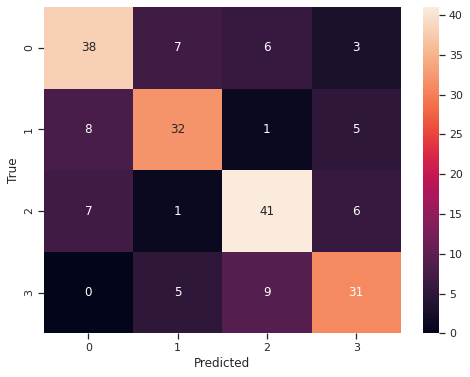

/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all threshol

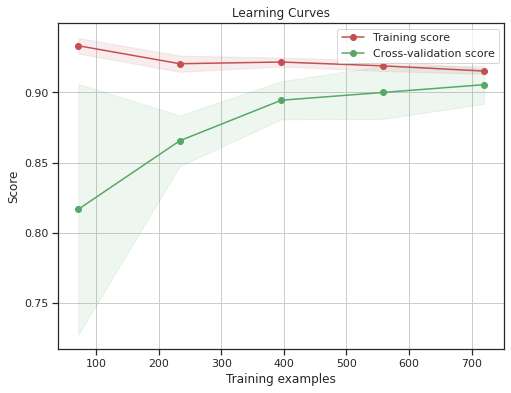

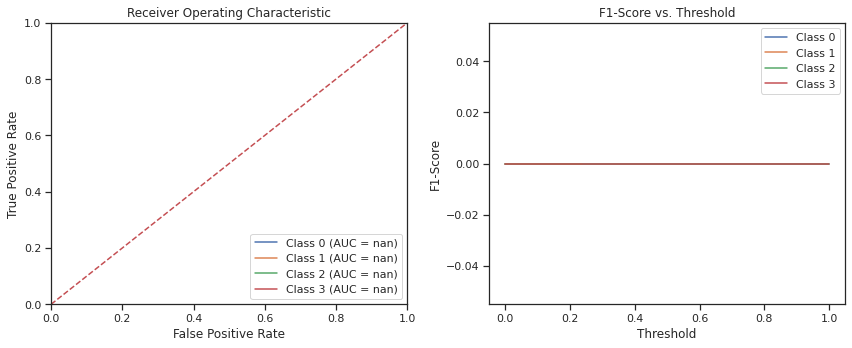

In [1693]:
import numpy as np
import matplotlib.pyplot as plt  # Add this import for plotting functions
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score

# Generate some example data (replace with your actual data)
# X, y = make_classification(n_samples=1000, n_features=20, n_classes=4, random_state=42)
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_classes=4,
    n_clusters_per_class=2,
    n_informative=3,  # Adjust this value
    random_state=42
)

# Convert data to NumPy arrays
X = np.array(X)
y = np.array(y)

# Define the KNN classifier model
model = KNeighborsClassifier(n_neighbors=5)

# Define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# Report the model performance using KNN
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

# Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the KNN model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data using the best model
y_pred = model.predict(X_test)

# You can also print a classification report for more detailed metrics
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
# Plot Confusion Matrix
class_names = ["bovine","poultry","swine","human"]
plot_confusion_matrix(y_test, y_pred, classes=class_names)

# Plot Learning Curves
plot_learning_curve(best_classifier, "Learning Curves", X_resampled, y_resampled, cv=5, n_jobs=-1)

# Plot ROC Curve and F1-Score graph
y_val_prob = best_classifier.predict_proba(X_val)
plot_roc_and_f1(y_val, y_val_prob,n_classes=4)


In [1697]:
len(y_pred)

200

# Random Forest Cross Fold Validation

In [1550]:
%%time
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load and preprocess your dataset (X and y)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Define the parameter grid for the Random Forest
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None,2,  5, 10, 20,30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4,8],
#     'random_state': [142]
# }
# Define the parameter grid for the Random Forest
# param_grid = {
#     'n_estimators': [200],
#     'max_depth': [5,10],
#     'min_samples_split': [2],
#     'min_samples_leaf': [8,3],
#     'random_state': [142]
# }
param_grid = {
    'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],#     'max_depth': [None,2,  5, 10, 20,30],

        'max_depth': [None,2, 4, 5, 10, 20,30],

    'max_features': [2, 3,6,8,10],
    'min_samples_leaf': [3, 4, 5,10],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a Random Forest classifier
model = RandomForestClassifier(random_state=142)

# Create a StratifiedKFold cross-validator with 10 folds (you can adjust the number of folds)
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=142)

# Perform grid search with cross-validation to find the best parameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=stratified_cv, scoring='accuracy')
grid_search.fit(X, y)

# Print the best parameters and corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Accuracy: {:.2f}".format(best_accuracy))

# Use the best parameters to create the final Random Forest model
best_model = RandomForestClassifier(**best_params)
# save best model
# Save the best model to a file
joblib.dump(best_model, 'best_random_forest_model.pkl')


# Train the model on the full training data
best_model.fit(X, y)

# Make predictions on your pre-existing test data (test_data_ethiopia)
y_pred = best_model.predict(X_test)

# Evaluate the model's performance on the test data
# Assuming you have the true labels for test data in y_ethiopia
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
ax15.set(title='Confusion Matrix', xlabel='Predicted Labels', ylabel='True Labels')

# You can also print a classification report for more detailed metrics
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


KeyboardInterrupt



Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}
Best Accuracy: 0.55
Test Accuracy: 0.42


/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


NameError: name 'class_labels' is not defined

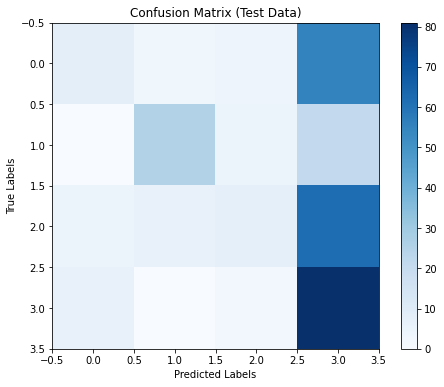

In [1558]:
# USe seperate test data
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Load and preprocess your dataset (X_train, y_train, X_val, y_val, X_test, y_test)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the parameter grid for the Random Forest
param_grid = {
    'bootstrap': [True],
    'max_depth': [None, 2, 4, 5, 10, 20, 30],
    'max_features': [2, 3, 6, 8, 10],
    'min_samples_leaf': [3, 4, 5, 10],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a Random Forest classifier
model = RandomForestClassifier(random_state=142)

# Perform grid search with cross-validation to find the best parameters using X_val and y_val
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy')
grid_search.fit(X_val, y_val)
cluster_labels=list(y_test.unique())
# Print the best parameters and corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Accuracy: {:.2f}".format(best_accuracy))
cluster_labels=list(y_test.unique())
# Use the best parameters to create the final Random Forest model
best_model = RandomForestClassifier(**best_params)

# Train the model on the full training data (including the validation set)
best_model.fit(X_train_resampled, y_train_resampled)

# Save the best model to a file
joblib.dump(best_model, 'best_random_forest_model.pkl')

# Make predictions on your test data (X_test)
y_test_pred = best_model.predict(X_test)

# Evaluate the model's performance on the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test:.2f}")

# Generate a confusion matrix for test data
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Plot Confusion Matrix for test data
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (Test Data)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.imshow(conf_matrix_test, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks(np.arange(len(class_labels)), class_labels, rotation=45)
plt.yticks(np.arange(len(class_labels)), class_labels)
plt.tight_layout()
plt.show()

# You can also print a classification report for more detailed metrics on test data
report_test = classification_report(y_test, y_test_pred)
print("Classification Report (Test Data):\n", report_test)


In [1555]:
list(y_test.unique())

array(['poultry', 'bovine', 'swine', 'human'], dtype=object)

In [1724]:
# undersampling
from imblearn.under_sampling import RandomUnderSampler

# Create an instance of RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Apply Random Under-sampling to your dataset
X_under, y_under = rus.fit_resample(X, y)
X_under

,305245,2027584,3906518,4027906,4552348,1804684,401701,620867,423595,341365,...,4554083,842668,44836,1239006,1922047,2211095,2212974,3051143,2181910,4089957
352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0
138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
564,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,4.0,4.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,4.0,4.0,0.0,4.0,4.0,0.0,4.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,4.0,4.0
2,4.0,4.0,0.0,4.0,4.0,0.0,4.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,4.0,4.0
248,4.0,4.0,0.0,4.0,4.0,0.0,4.0,4.0,4.0,0.0,...,0.0,4.0,0.0,4.0,4.0,4.0,0.0,0.0,4.0,4.0
76,4.0,4.0,0.0,4.0,0.0,0.0,4.0,4.0,4.0,0.0,...,0.0,4.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,4.0


Classification Report:
               precision    recall  f1-score   support

      bovine       0.57      0.42      0.48        19
       human       0.00      1.00      0.00         0
     poultry       0.00      0.00      1.00        12
       swine       0.65      0.87      0.74        38

    accuracy                           0.59        69
   macro avg       0.30      0.57      0.56        69
weighted avg       0.51      0.59      0.72        69



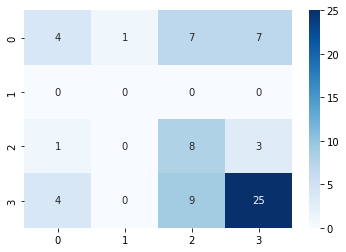

In [864]:
# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
ax15.set(title='Confusion Matrix', xlabel='Predicted Labels', ylabel='True Labels')


# You can also print a classification report for more detailed metrics
report = classification_report(y_ethiopia, y_pred,zero_division=1)
print("Classification Report:\n", report)

In [552]:
y.value_counts()

category
poultry    225
swine      217
bovine     155
human      115
Name: count, dtype: int64

In [549]:
# Plot the confusion matrix
# p(best_model, test_data_ethiopia, y_ethiopia, cmap=plt.cm.Blues)
# plt.title("Confusion Matrix")
# plt.show()
# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=ax15)
ax15.set(title='Confusion Matrix', xlabel='Predicted Labels', ylabel='True Labels')
print(conf_matrix)

# You can also print a classification report for more detailed metrics
report = classification_report(y_ethiopia, y_pred,zero_division=1)
print("Classification Report:\n", report)

[[ 5  1  2 11]
 [ 0  0  0  0]
 [ 1  0  0 11]
 [ 4  0  0 34]]
Classification Report:
               precision    recall  f1-score   support

      bovine       0.50      0.26      0.34        19
       human       0.00      1.00      0.00         0
     poultry       0.00      0.00      1.00        12
       swine       0.61      0.89      0.72        38

    accuracy                           0.57        69
   macro avg       0.28      0.54      0.52        69
weighted avg       0.47      0.57      0.67        69



# Light GBM

In [1211]:
# LightGBM
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

# Load and preprocess your dataset (X and y)

# Create a LightGBM classifier
params = {
    'objective': 'multiclass',  # Change to 'multiclass' for multi-class classification
    'boosting_type': 'gbdt',
    'random_state': 123,
    'max_depth': 4,
 'num_leaves': 15, # Adjust this value based on your dataset and problem
'n_estimators': 150
}

model = lgb.LGBMClassifier(**params)

# Create a StratifiedKFold cross-validator with 5 folds (you can adjust the number of folds)
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=142)

# Perform stratified 10-fold cross-validation on the model
cv_scores = cross_val_score(model, X, y, cv=stratified_cv, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.2f}".format(cv_scores.mean()))

# Train the model on the full training data
model.fit(X, y)

# Make predictions on your pre-existing test data (test_data_ethiopia)
y_pred = model.predict(X_test)

# Evaluate the model's performance on the test data
# Assuming you have the true labels for test data in y_test_ethiopia
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# You can also print a classification report for more detailed metrics
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 205
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 100
[LightGBM] [Info] Start training from score -1.523599
[LightGBM] [Info] Start training from score -1.822092
[LightGBM] [Info] Start training from score -1.150924
[LightGBM] [Info] Start training from score -1.190589
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001947 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 205
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 100
[LightGBM] [Info] Start training from score -1.523599
[LightGBM] [Info] Start training from score -1.822092
[LightGBM] [Info] Start training from score -1.150924
[LightGBM] [Info] Start training from score -1.190589
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

# XgBoost

In [632]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load and preprocess your dataset (X and y)
# Replace this section with your dataset loading and preprocessing code
# You should have X and y as your feature and target data.

# Assuming y contains your string labels, let's encode them
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Create an XGBoost classifier
params = {
    'objective': 'multi:softprob',  # Change to 'multi:softprob' for multi-class probabilities
    'random_state': 42,
    'max_depth': 5,
    'num_class': len(np.unique(y_encoded)),  # Number of unique classes in your dataset
    'n_estimators': 100,  # Adjust this value based on your dataset and problem
}

model = xgb.XGBClassifier(**params)

# Create a StratifiedKFold cross-validator with 5 folds (you can adjust the number of folds)
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search to find the best parameters and save the best model
grid_search = GridSearchCV(model, param_grid={}, cv=stratified_cv, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Train the best model on the full training data
best_model.fit(X_resampled, y_resampled)

# Save the best model to a file
best_model.save_model('best_xgboost_model.model')
# Replace test_data_ethiopia with your actual test data
y_pred_encoded = best_model.predict(test_data_ethiopia)

# Decode the predicted labels back to their original string labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the best model's performance on the test data
# Replace y_ethiopia with the true labels for your test data
accuracy = accuracy_score(true_labels_for_test_data, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# You can also print a classification report for more detailed metrics
report = classification_report(true_labels_for_test_data, y_pred)
print("Classification Report:\n", report)


ValueError: Supported target types are: ('binary', 'multiclass'). Got 'multilabel-indicator' instead.

In [ ]:
accuracy = accuracy_score(y_ethiopia, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# You can also print a classification report for more detailed metrics
report = classification_report(y_ethiopia, y_pred)
print("Classification Report:\n", report)

# SVM

In [1234]:
# SVM 
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load and preprocess your dataset (X and y)

# Define the parameter grid for the SVM
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7))
}

# Create an SVM classifier
svm = SVC(random_state=142)

# Create a StratifiedKFold cross-validator with 10 folds (you can adjust the number of folds)
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=142)

# Perform grid search with cross-validation to find the best parameters
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=stratified_cv, scoring='accuracy')
grid_search.fit(X, y)

# Print the best parameters and corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Accuracy: {:.2f}".format(best_accuracy))

# Use the best parameters to create the final SVM model
best_svm = SVC(**best_params, random_state=42)

# Train the model on the full training data
best_svm.fit(X, y)

# Make predictions on your pre-existing test data (test_data_ethiopia)
y_pred = best_svm.predict(X_test)

# Evaluate the model's performance on the test data
# Assuming you have the true labels for test data in y_test_ethiopia
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# You can also print a classification report for more detailed metrics
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy: 0.96
Test Accuracy: 0.34
Classification Report:
               precision    recall  f1-score   support

      bovine       0.46      0.09      0.14        70
       human       1.00      0.02      0.04        51
     poultry       0.46      0.14      0.21        80
       swine       0.33      0.92      0.48        89

    accuracy                           0.34       290
   macro avg       0.56      0.29      0.22       290
weighted avg       0.51      0.34      0.25       290



/home/jupyter-onyangob/.local/lib/python3.9/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [598]:
! pip install XgBoost

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 200.3 MB 54 kB/s              :31


In [1142]:
# Make predictions on your pre-existing test data (test_data_ethiopia)
y_pred = best_model.predict(test_data_ug)
# Evaluate the best model's performance on the test data
# Assuming you have the true labels for test data in y_test_ethiopia
accuracy = accuracy_score(y_ug, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")
# You can also print a classification report for more detailed metrics
report = classification_report(y_ug, y_pred)
print("Classification Report:\n", report)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- BioSample
- Isolation source
- category
- country
- sra_accession


In [521]:
y_ug

0     poultry
1     poultry
2     poultry
3     poultry
4     poultry
5     poultry
6     poultry
7     poultry
8     poultry
9     poultry
10    poultry
11    poultry
12    poultry
13     bovine
14    poultry
15     bovine
16    poultry
Name: category, dtype: object

In [517]:
y_ethiopia.to_list()

['poultry',
 'bovine',
 'poultry',
 'bovine',
 'bovine',
 'swine',
 'swine',
 'swine',
 'swine',
 'poultry',
 'swine',
 'swine',
 'bovine',
 'swine',
 'poultry',
 'swine',
 'swine',
 'swine',
 'bovine',
 'swine',
 'swine',
 'bovine',
 'poultry',
 'bovine',
 'swine',
 'swine',
 'poultry',
 'bovine',
 'poultry',
 'swine',
 'swine',
 'swine',
 'bovine',
 'swine',
 'swine',
 'poultry',
 'swine',
 'poultry',
 'swine',
 'swine',
 'bovine',
 'bovine',
 'swine',
 'bovine',
 'bovine',
 'poultry',
 'swine',
 'swine',
 'swine',
 'swine',
 'bovine',
 'bovine',
 'swine',
 'bovine',
 'swine',
 'swine',
 'swine',
 'swine',
 'bovine',
 'bovine',
 'swine',
 'swine',
 'swine',
 'bovine',
 'swine',
 'poultry',
 'swine',
 'swine',
 'poultry']

In [465]:
y_ethiopia

0     poultry
1      bovine
2     poultry
3      bovine
4      bovine
       ...   
64      swine
65    poultry
66      swine
67      swine
68    poultry
Name: category, Length: 69, dtype: object

In [454]:
y_ethiopia.to_list()

['poultry',
 'bovine',
 'poultry',
 'bovine',
 'bovine',
 'swine',
 'swine',
 'swine',
 'swine',
 'poultry',
 'swine',
 'swine',
 'bovine',
 'swine',
 'poultry',
 'swine',
 'swine',
 'swine',
 'bovine',
 'swine',
 'swine',
 'bovine',
 'poultry',
 'bovine',
 'swine',
 'swine',
 'poultry',
 'bovine',
 'poultry',
 'swine',
 'swine',
 'swine',
 'bovine',
 'swine',
 'swine',
 'poultry',
 'swine',
 'poultry',
 'swine',
 'swine',
 'bovine',
 'bovine',
 'swine',
 'bovine',
 'bovine',
 'poultry',
 'swine',
 'swine',
 'swine',
 'swine',
 'bovine',
 'bovine',
 'swine',
 'bovine',
 'swine',
 'swine',
 'swine',
 'swine',
 'bovine',
 'bovine',
 'swine',
 'swine',
 'swine',
 'bovine',
 'swine',
 'poultry',
 'swine',
 'swine',
 'poultry']

In [390]:
y_ug

0     poultry
1     poultry
2     poultry
3     poultry
4     poultry
5     poultry
6     poultry
7     poultry
8     poultry
9     poultry
10    poultry
11    poultry
12    poultry
13     bovine
14    poultry
15     bovine
16    poultry
Name: category, dtype: object

In [181]:
# # plot ROC
# from itertools import cycle
# from sklearn.metrics import auc, roc_curve
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import RocCurveDisplay

# # store the fpr, tpr, and roc_auc for all averaging strategies
# fpr, tpr, roc_auc = dict(), dict(), dict()
# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_pred.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# micro_roc_auc_ovr = roc_auc_score(
#     y_test,
#     y_score,
#     multi_class="ovr",
#     average="micro",
# )

# # macro averaging 
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# fpr_grid = np.linspace(0.0, 1.0, 1000)

# # Interpolate all ROC curves at these points
# mean_tpr = np.zeros_like(fpr_grid)

# for i in range(n_classes):
#     mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# # Average it and compute AUC
# mean_tpr /= n_classes

# fpr["macro"] = fpr_grid
# tpr["macro"] = mean_tpr
# roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


# print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")
# macro_roc_auc_ovr = roc_auc_score(
#     y_test,
#     y_score,
#     multi_class="ovr",
#     average="macro",
# )

# print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr:.2f}")
# fig, ax = plt.subplots(figsize=(6, 6))

# plt.plot(
#     fpr["micro"],
#     tpr["micro"],
#     label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
#     color="deeppink",
#     linestyle=":",
#     linewidth=4,
# )

# plt.plot(
#     fpr["macro"],
#     tpr["macro"],
#     label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
#     color="navy",
#     linestyle=":",
#     linewidth=4,
# )

# colors = cycle(["aqua", "darkorange", "cornflowerblue"])
# for class_id, color in zip(range(n_classes), colors):
#     RocCurveDisplay.from_predictions(
#         y_onehot_test[:, class_id],
#         y_score[:, class_id],
#         name=f"ROC curve for {target_names[class_id]}",
#         color=color,
#         ax=ax,
#         plot_chance_level=(class_id == 2),
#     )

# plt.axis("square")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
# plt.legend()
# plt.show()

In [180]:
y_onehot_test.shape
y_pred.shape

(75, 3)

# Stratified cross validation

Scanning